#### Ph√¢n t√≠ch d·ªØ li·ªáu kh√°ch h√†ng Netflix

##### - Dataset : netflix_customer_churn
##### - M·ª•c ti√™u : D·ª± ƒëo√°n h√†nh vi ng∆∞·ªùi d√πng c√≥ mu·ªën r·ªùi b·ªè Netflix hay kh√¥ng v·ªõi m√¥ h√¨nh Decision Tree v√† Logistic Linear 

##### Import th∆∞ vi·ªán

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

##### Load d·ªØ li·ªáu

In [48]:
df = pd.read_csv('netflix_customer_churn.csv')
df.head()

customer_id  age  gender subscription_type  \
0  a9b75100-82a8-427a-a208-72f24052884a   51   Other             Basic   
1  49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b   47   Other          Standard   
2  4d71f6ce-fca9-4ff7-8afa-197ac24de14b   27  Female          Standard   
3  d3c72c38-631b-4f9e-8a0e-de103cad1a7d   53   Other           Premium   
4  4e265c34-103a-4dbb-9553-76c9aa47e946   56   Other          Standard   

   watch_hours  last_login_days   region  device  monthly_fee  churned  \
0        14.73               29   Africa      TV         8.99        1   
1         0.70               19   Europe  Mobile        13.99        1   
2        16.32               10     Asia      TV        13.99        0   
3         4.51               12  Oceania      TV        17.99        1   
4         1.89               13   Africa  Mobile        13.99        1   

  payment_method  number_of_profiles  avg_watch_time_per_day favorite_genre  
0      Gift Card                   1                    0.49         Action  
1      Gift Card                   5                    0.03         Sci-Fi  
2         Crypto                   2                    1.48          Drama  
3         Crypto                   2                    0.35         Horror  
4         Crypto                   2                    0.13         Action

##### Ph√¢n t√≠ch d·ªØ li·ªáu

In [49]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

age  watch_hours  last_login_days  monthly_fee      churned  \
count  5000.000000  5000.000000      5000.000000  5000.000000  5000.000000   
mean     43.847400    11.649450        30.089800    13.683400     0.503000   
std      15.501128    12.014654        17.536078     3.692062     0.500041   
min      18.000000     0.010000         0.000000     8.990000     0.000000   
25%      30.000000     3.337500        15.000000     8.990000     0.000000   
50%      44.000000     8.000000        30.000000    13.990000     1.000000   
75%      58.000000    16.030000        45.000000    17.990000     1.000000   
max      70.000000   110.400000        60.000000    17.990000     1.000000   

       number_of_profiles  avg_watch_time_per_day  
count         5000.000000             5000.000000  
mean             3.024400                0.874800  
std              1.415841                2.619824  
min              1.000000                0.000000  
25%              2.000000                0.110000  
50%              3.000000                0.290000  
75%              4.000000                0.720000  
max              5.000000               98.420000

In [50]:
# Ki·ªÉm tra d·ªØ li·ªáu c√≥ tr√πng l·∫∑p kh√¥ng 
df.duplicated().sum()

0

In [51]:
# Ki·ªÉm tra missing values
print("Missing values after cleaning:")
print(df.isnull().sum())    

Missing values after cleaning:
customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64


In [52]:
# Lo·∫°i b·ªè c·ªôt kh√¥ng c·∫ßn thi·∫øt (v√≠ d·ª•: customer_id)
df = df.drop(['customer_id'], axis=1)

In [53]:
df.head()

age  gender subscription_type  watch_hours  last_login_days   region  \
0   51   Other             Basic        14.73               29   Africa   
1   47   Other          Standard         0.70               19   Europe   
2   27  Female          Standard        16.32               10     Asia   
3   53   Other           Premium         4.51               12  Oceania   
4   56   Other          Standard         1.89               13   Africa   

   device  monthly_fee  churned payment_method  number_of_profiles  \
0      TV         8.99        1      Gift Card                   1   
1  Mobile        13.99        1      Gift Card                   5   
2      TV        13.99        0         Crypto                   2   
3      TV        17.99        1         Crypto                   2   
4  Mobile        13.99        1         Crypto                   2   

   avg_watch_time_per_day favorite_genre  
0                    0.49         Action  
1                    0.03         Sci-Fi  
2                    1.48          Drama  
3                    0.35         Horror  
4                    0.13         Action

#### Kh√°m ph√° d·ªØ li·ªáu
 ##### 1. Ph√¢n t√≠ch ƒë∆°n bi·∫øn
 

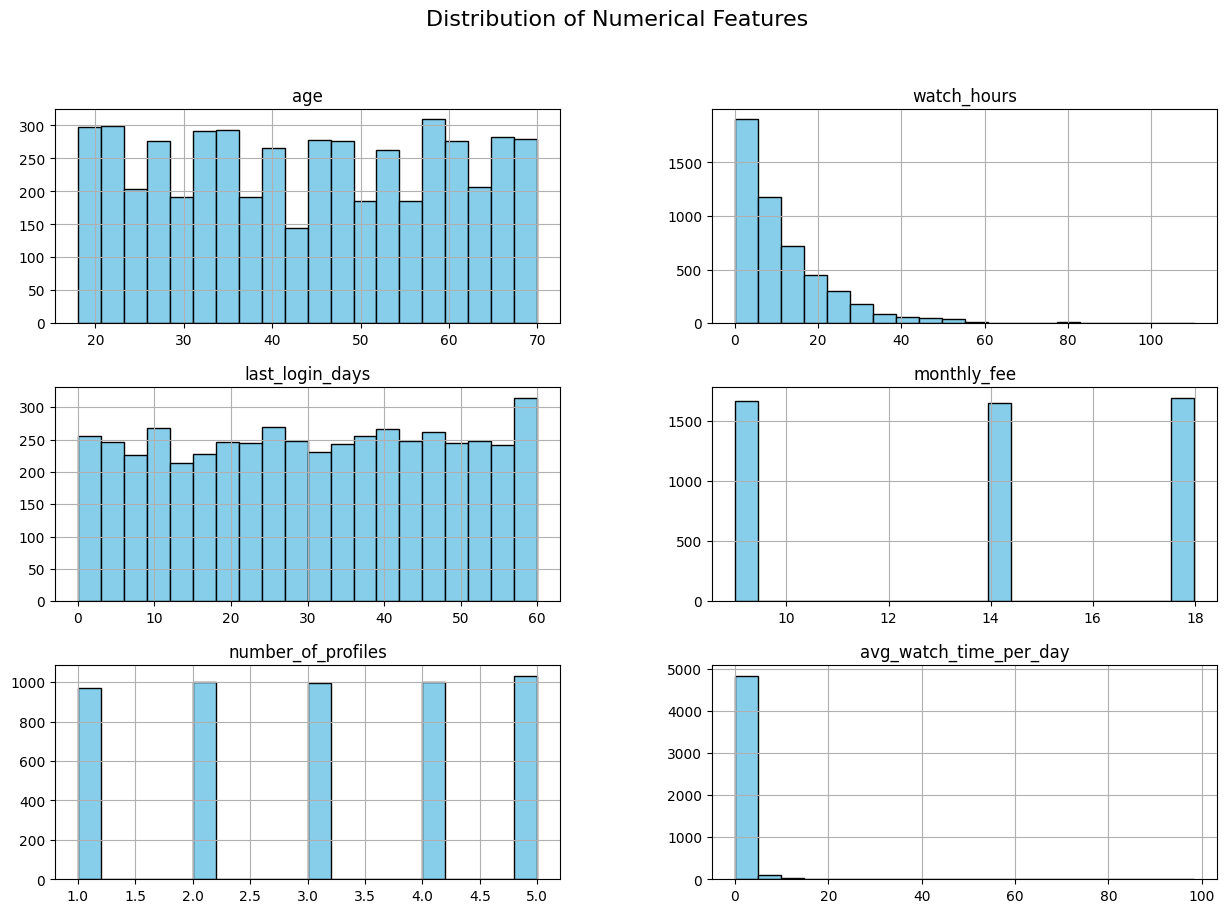

C:\Users\Tequila\AppData\Local\Temp\ipykernel_8756\3271429985.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\Tequila\AppData\Local\Temp\ipykernel_8756\3271429985.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\Tequila\AppData\Local\Temp\ipykernel_8756\3271429985.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\Tequila\AppData\Local\Temp\ipykernel_8756\3271429985.py:17: FutureWarning: 

Passing `palet

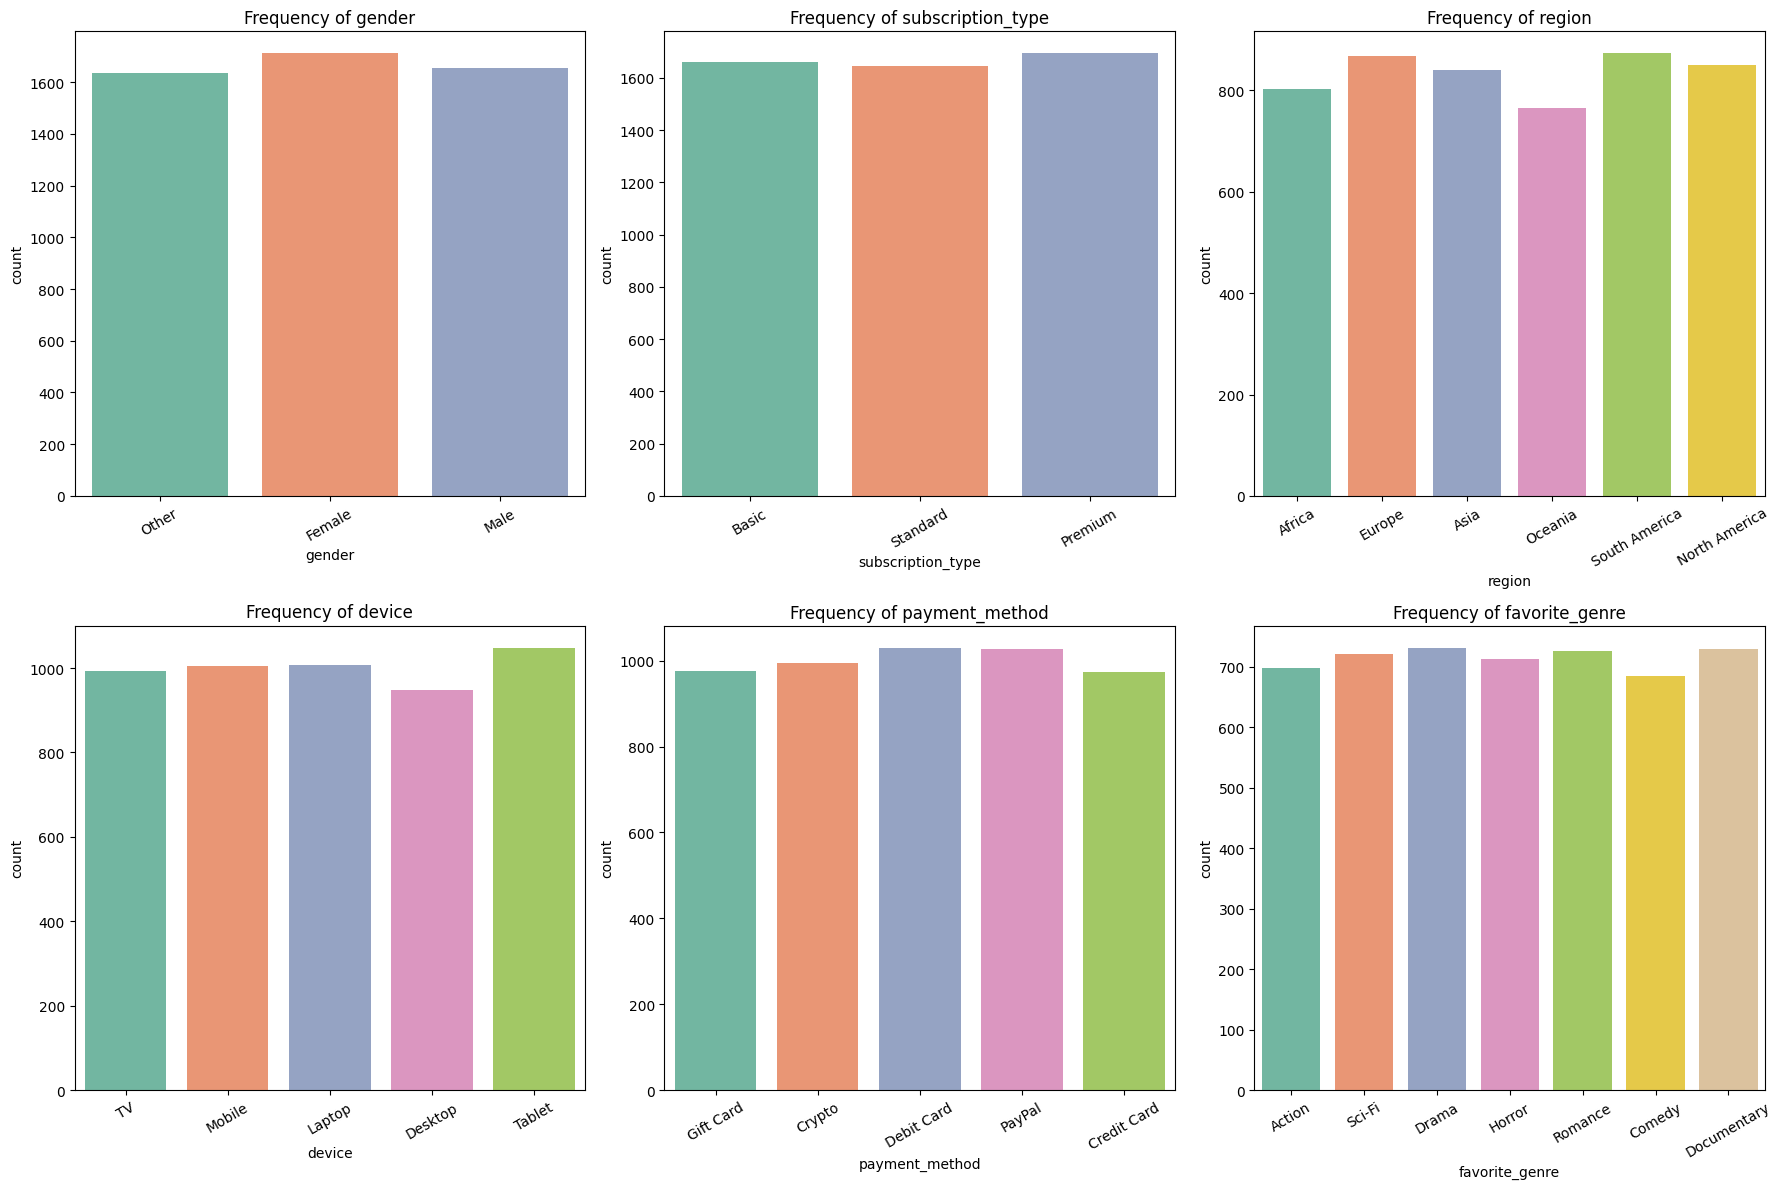

C:\Users\Tequila\AppData\Local\Temp\ipykernel_8756\3271429985.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='churned', palette='Set1')


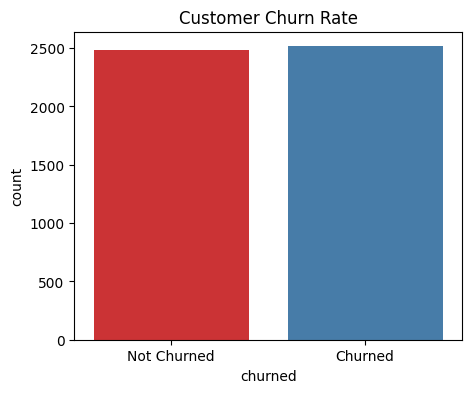

In [54]:
# Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of numerical features
num_cols = ['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'number_of_profiles', 'avg_watch_time_per_day']
df[num_cols].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

# 2. Frequency of categorical features
cat_cols = ['gender', 'subscription_type', 'region', 'device', 'payment_method', 'favorite_genre']
plt.figure(figsize=(18, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# 3. Churn rate
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='churned', palette='Set1')
plt.title('Customer Churn Rate')
plt.xticks([0,1], ['Not Churned', 'Churned'])
plt.show()



##### Theo ƒë√°nh gi√° ta nh·∫≠n th·∫•y: T·ªâ l·ªá h√†nh vi ng∆∞·ªùi d√πng r·ªùi b·ªè v√† ng∆∞·ªùi d√πng ti·∫øp t·ª•c s·ª≠ d·ª•ng l√† 50 - 50 

##### 2. Ph√¢n t√≠ch hai bi·∫øn 


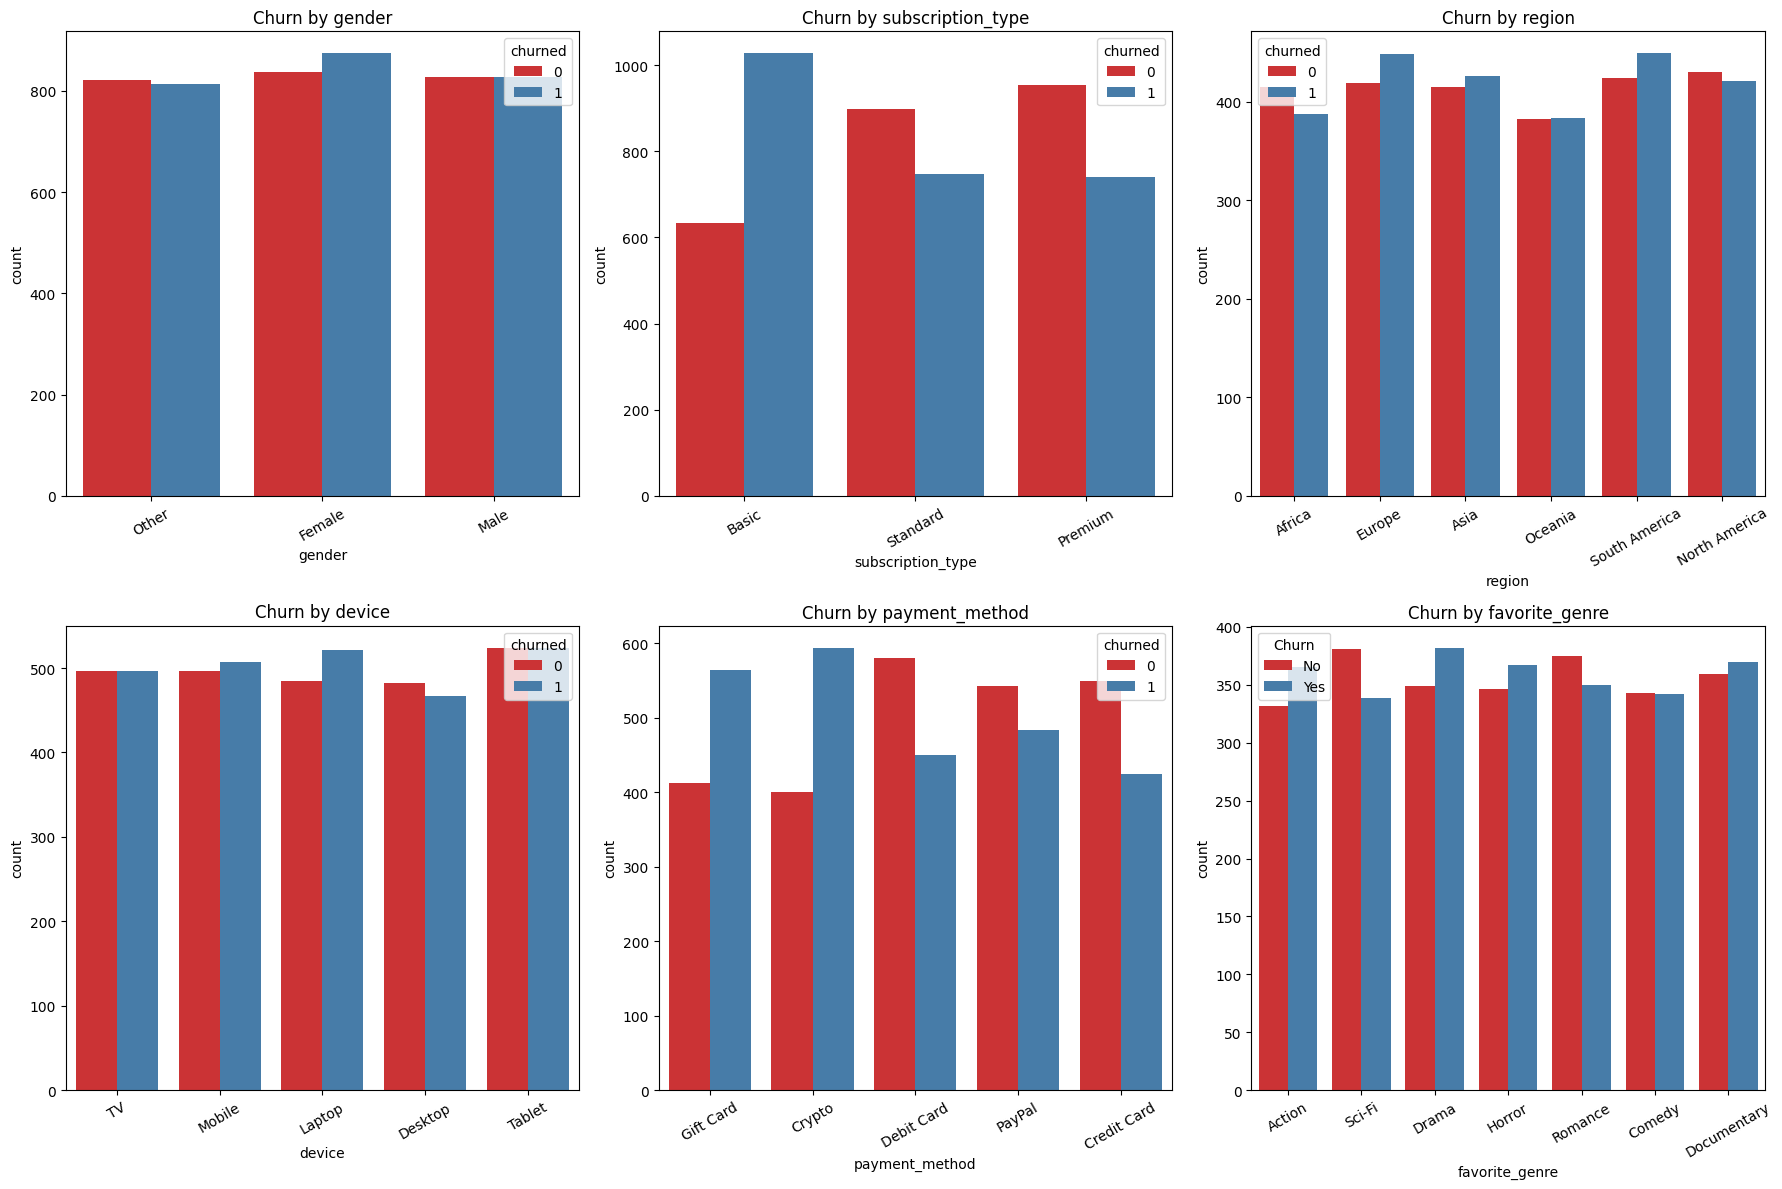

C:\Users\Tequila\AppData\Local\Temp\ipykernel_8756\4138538993.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churned', y=col, palette='Set1')
C:\Users\Tequila\AppData\Local\Temp\ipykernel_8756\4138538993.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churned', y=col, palette='Set1')
C:\Users\Tequila\AppData\Local\Temp\ipykernel_8756\4138538993.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churned', y=col, palette='Set1')
C:\Users\Tequila\AppData\Local\Temp\ipykernel_8756\4138538993.py:16

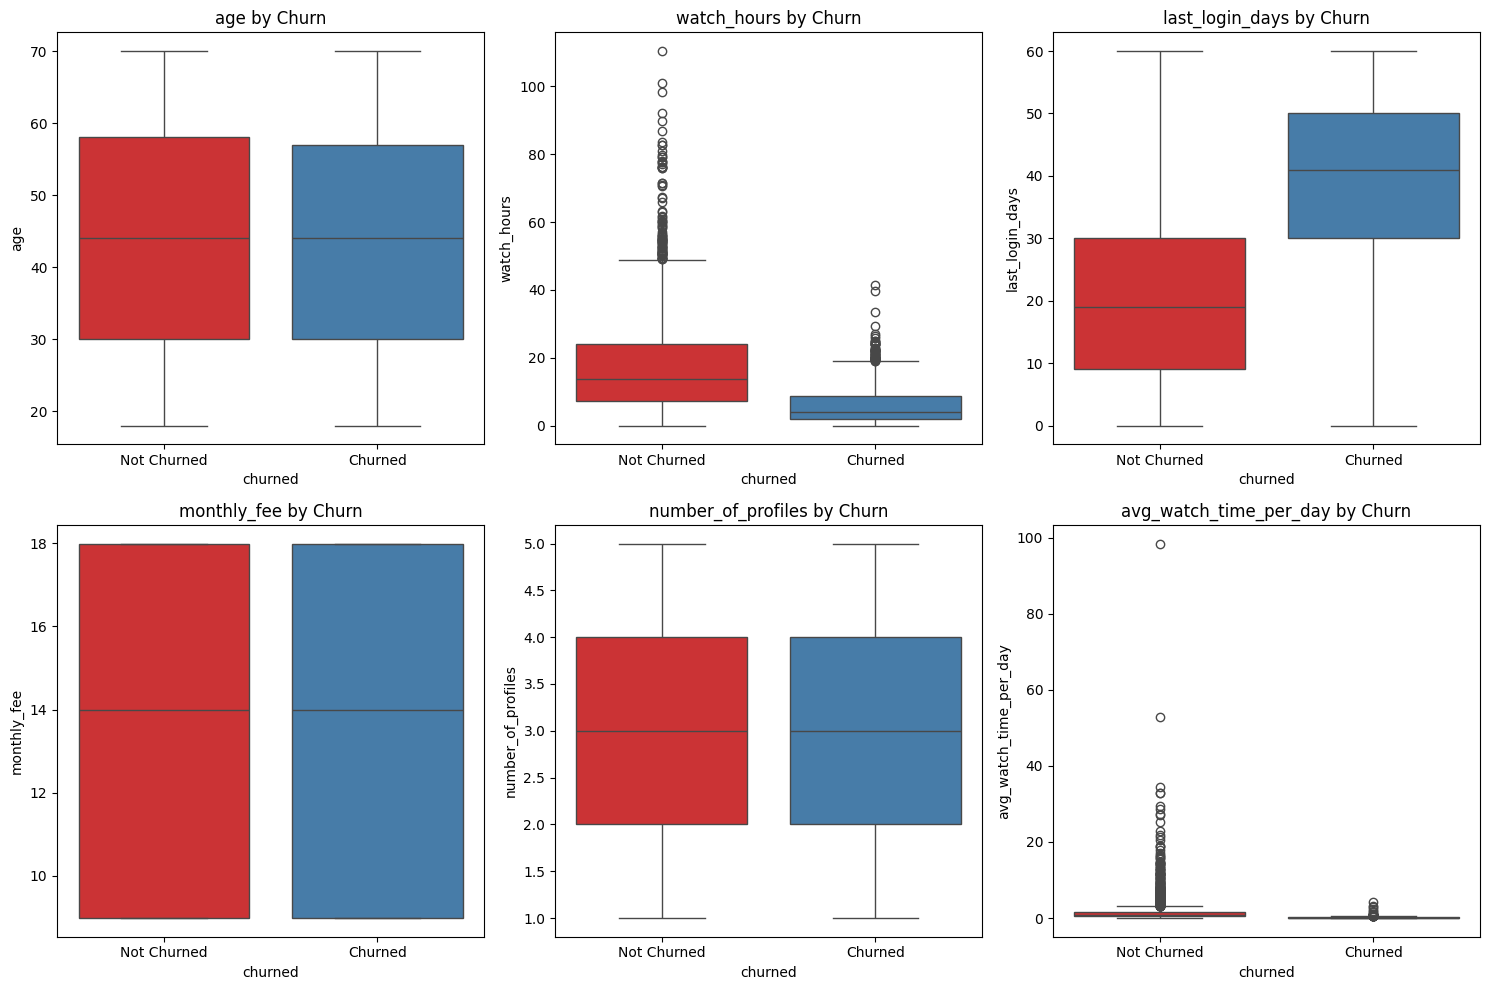

In [55]:
# 4. Relationship between churn and categorical features
plt.figure(figsize=(18, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, hue='churned', palette='Set1')
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=30)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# 5. Relationship between churn and numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='churned', y=col, palette='Set1')
    plt.title(f'{col} by Churn')
    plt.xticks([0,1], ['Not Churned', 'Churned'])
plt.tight_layout()
plt.show()

##### - Theo gi·ªõi t√≠nh th√¨ s·ªë l∆∞·ª£ng nam gi·ªõi r·ªùi b·ªè s·ª≠ d·ª•ng d·ªãch v·ª• c·ªßa Netflix kh√° cao.
##### - H·∫ßu h·∫øt ng∆∞·ªùi d√πng kh√¥ng th√≠ch s·ª≠ d·ª•ng g√≥i Basic cho l·∫Øm v√† ∆∞u ti√™n s·ª≠ d·ª•ng g√≥i Premium h∆°n.
##### - ƒêa s·ªë ng∆∞·ªùi xem d√πng thi·∫øt b·ªã Laptop nhi·ªÅu nh·∫•t
 

In [56]:
X = df.drop(columns=['churned'])
y = df['churned']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy Decision Tree: 0.971
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       498
           1       0.97      0.98      0.97       502

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



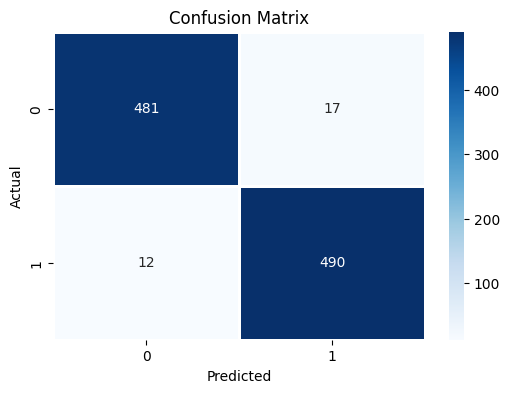

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# N·∫øu X ch·ª©a bi·∫øn d·∫°ng object (chu·ªói), c·∫ßn m√£ h√≥a ch√∫ng tr∆∞·ªõc khi hu·∫•n luy·ªán m√¥ h√¨nh
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# T√°ch l·∫°i t·∫≠p train/test v·ªõi d·ªØ li·ªáu ƒë√£ m√£ h√≥a
X_train_enc = X_encoded.loc[X_train.index]
X_test_enc = X_encoded.loc[X_test.index]

# Kh·ªüi t·∫°o v√† hu·∫•n luy·ªán m√¥ h√¨nh Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_enc, y_train)

# D·ª± ƒëo√°n tr√™n t·∫≠p test
y_pred_dt = dt_model.predict(X_test_enc)

# ƒê√°nh gi√° m√¥ h√¨nh
print("Accuracy Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=2)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Feature Importances (Decision Tree):
                   Feature  Importance
10  avg_watch_time_per_day    0.592423
8           payment_method    0.089971
3              watch_hours    0.079716
9       number_of_profiles    0.077596
4          last_login_days    0.067355
2        subscription_type    0.036714
7              monthly_fee    0.035125
0                      age    0.005886
11          favorite_genre    0.005059
5                   region    0.004305
6                   device    0.003554
1                   gender    0.002297


C:\Users\Tequila\AppData\Local\Temp\ipykernel_8756\3785392967.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20), palette='viridis')


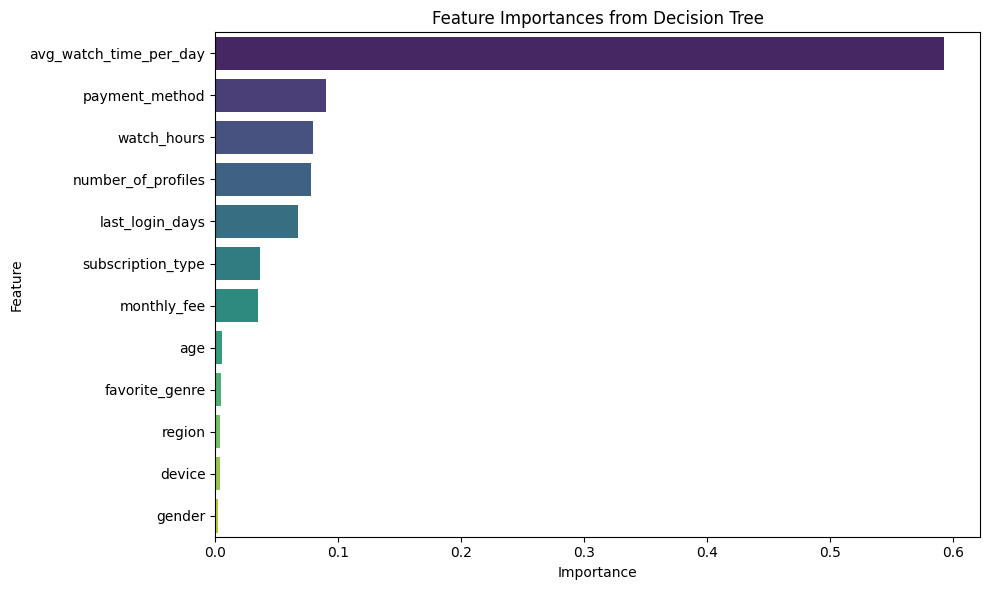

In [59]:
# Feature importance for Decision Tree
importances = dt_model.feature_importances_
feature_names = X_encoded.columns

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances (Decision Tree):")
print(feat_imp_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20), palette='viridis')
plt.title('Feature Importances from Decision Tree')
plt.tight_layout()
plt.show()


‚úÖ Nh·∫≠n x√©t t·ªïng th·ªÉ:
Feature avg_watch_time_per_day c·ª±c k·ª≥ quan tr·ªçng:

N√≥ chi·∫øm h∆°n 60% t·ªïng m·ª©c ƒë·ªô quan tr·ªçng.

ƒêi·ªÅu n√†y cho th·∫•y: "th·ªùi gian xem trung b√¨nh m·ªói ng√†y" l√† y·∫øu t·ªë then ch·ªët trong vi·ªác m√¥ h√¨nh quy·∫øt ƒë·ªãnh ph√¢n lo·∫°i.

Nh√≥m feature c√≥ m·ª©c ·∫£nh h∆∞·ªüng v·ª´a:

payment_method, watch_hours, number_of_profiles, last_login_days c√≥ importance kho·∫£ng 0.05 ‚Äì 0.08.

Ch√∫ng l√† nh·ªØng y·∫øu t·ªë ph·ª• tr·ª£ c√≥ ƒë√≥ng g√≥p, nh∆∞ng kh√¥ng n·ªïi b·∫≠t b·∫±ng feature ƒë·∫ßu ti√™n.

Nh√≥m feature √≠t ·∫£nh h∆∞·ªüng ho·∫∑c kh√¥ng ƒë√°ng k·ªÉ:

age, favorite_genre, region, device, gender c√≥ gi√° tr·ªã g·∫ßn 0.

Nh·ªØng feature n√†y g·∫ßn nh∆∞ kh√¥ng gi√∫p √≠ch nhi·ªÅu cho vi·ªác ph√¢n t√°ch d·ªØ li·ªáu theo ti√™u ch√≠ c·ªßa m√¥ h√¨nh.

üéØ Gi·∫£i th√≠ch ti·ªÅm nƒÉng:
Feature	G·ª£i √Ω gi·∫£i th√≠ch
- avg_watch_time_per_day : Ng∆∞·ªùi d√πng xem nhi·ªÅu/ng√†y c√≥ th·ªÉ l√† kh√°ch h√†ng trung th√†nh ‚Üí d·ªÖ d·ª± ƒëo√°n h√†nh vi.
- ayment_method : Ph∆∞∆°ng th·ª©c thanh to√°n c√≥ th·ªÉ ph·∫£n √°nh m·ª©c ƒë·ªô cam k·∫øt (VD: credit card vs prepaid).
-number_of_profiles : C√≥ th·ªÉ li√™n quan ƒë·∫øn quy m√¥ gia ƒë√¨nh, ·∫£nh h∆∞·ªüng ƒë·∫øn usage pattern.
- last_login_days : T·∫ßn su·∫•t ƒëƒÉng nh·∫≠p g·∫ßn ƒë√¢y ‚Üí ph·∫£n √°nh m·ª©c ƒë·ªô g·∫Øn b√≥.
- age, gender, region : D·ªØ li·ªáu nh√¢n kh·∫©u h·ªçc c√≥ th·ªÉ kh√¥ng li√™n quan tr·ª±c ti·∫øp ƒë·∫øn h√†nh vi xem.


‚úÖ K·∫øt lu·∫≠n:
Bi·ªÉu ƒë·ªì cho th·∫•y m√¥ h√¨nh ƒëang r·∫•t ph·ª• thu·ªôc v√†o m·ªôt feature ch√≠nh (avg_watch_time_per_day), c√≤n l·∫°i c√°c feature kh√°c ƒë√≥ng vai tr√≤ ph·ª•. 


Accuracy Logistic Regression: 0.877
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       498
           1       0.87      0.89      0.88       502

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



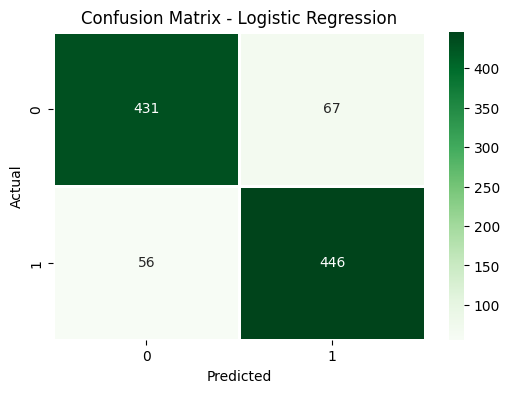

In [60]:
from sklearn.linear_model import LogisticRegression

# Kh·ªüi t·∫°o v√† hu·∫•n luy·ªán m√¥ h√¨nh Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_enc, y_train)

# D·ª± ƒëo√°n tr√™n t·∫≠p test
y_pred_lr = lr_model.predict(X_test_enc)

# ƒê√°nh gi√° m√¥ h√¨nh
print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', linewidths=2)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


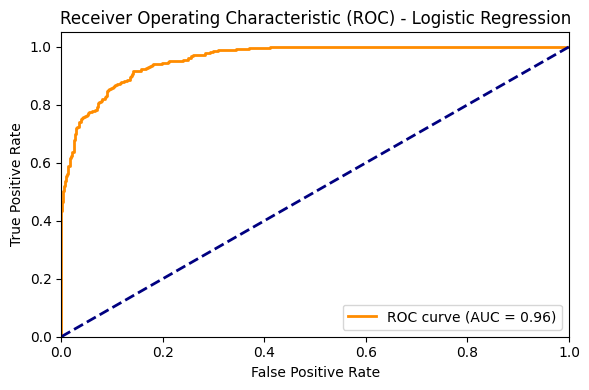

In [ ]:
# Predict probabilities for the positive class
y_proba_lr = lr_model.predict_proba(X_test_enc)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)
auc_score = roc_auc_score(y_test, y_proba_lr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


‚úÖ Ph√¢n t√≠ch bi·ªÉu ƒë·ªì ROC:
1. AUC = 0.96:
ƒê√¢y l√† m·ªôt k·∫øt qu·∫£ r·∫•t t·ªët.

AUC (Area Under Curve) n·∫±m trong kho·∫£ng [0.5, 1], v·ªõi:

0.5 ‚Üí m√¥ h√¨nh ƒëo√°n ng·∫´u nhi√™n.

1.0 ‚Üí m√¥ h√¨nh ph√¢n bi·ªát ho√†n h·∫£o.

‚áí AUC = 0.96 c√≥ nghƒ©a l√†: Logistic Regression ph√¢n bi·ªát c·ª±c k·ª≥ t·ªët gi·ªØa 2 l·ªõp (positive vs. negative).

2. ƒê∆∞·ªùng ROC cong s√°t g√≥c tr√™n tr√°i:
Nghƒ©a l√†: m√¥ h√¨nh c√≥ True Positive Rate (TPR) cao ngay c·∫£ khi False Positive Rate (FPR) th·∫•p.

ƒêi·ªÅu n√†y cho th·∫•y m√¥ h√¨nh hi·ªáu qu·∫£ trong vi·ªác ph√°t hi·ªán ƒë√∫ng m·∫´u d∆∞∆°ng (positive) m√† kh√¥ng hy sinh qu√° nhi·ªÅu sai nh·∫ßm.

‚úÖ K·∫øt lu·∫≠n:
M√¥ h√¨nh Logistic Regression ho·∫°t ƒë·ªông r·∫•t t·ªët, v·ªõi AUC = 0.96, cho th·∫•y kh·∫£ nƒÉng ph√¢n lo·∫°i g·∫ßn nh∆∞ t·ªëi ∆∞u.